In [ ]:
#Instalar e importar las librerías necesarias
!pip install criticalpath
from criticalpath import Node
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import math
import random as rnd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for criticalpath: filename=criticalpath-0.1.5-py3-none-any.whl size=12043 sha256=ac564a1dd9d25778c4c991a1089840f28dd2f13e9aa0f01c35ea73c37f626a5f
  Stored in directory: /root/.cache/pip/wheels/64/81/a9/a04f8d62637ec9a2515ec6610bb812be2cde2898f1940401d4
Successfully built criticalpath


In [ ]:
#Ingresar los datos del modelo (Tareas y dependencias)
p = Node('proyecto')

tareas = [("A", {"duracion": 3}),
          ("B", {"duracion": 4}),
          ("C", {"duracion": 2}),
          ("D", {"duracion": 6}),
          ("E", {"duracion": 5}),
          ("F", {"duracion": 3}),
          ("G", {"duracion": 7}),
          ("H", {"duracion": 5}),
          ("I", {"duracion": 8})]


dependencias = [("A", "B"),
                ("A", "C"),
                ("B", "D"),
                ("C", "D"),
                ("C", "E"),
                ("C", "F"),
                ("E", "G"),
                ("E", "H"),
                ("F", "H"),
                ("D", "I"),
                ("G", "I"),
                ("H", "I")]

# Cargar al proyecto las tareas y sus duraciones
for i in tareas:
    p.add(Node(i[0], duration=i[1]["duracion"]))

# Cargar al proyecto sus dependencias (secuencias)
for j in dependencias:
    p.link(j[0],j[1])

# Actualizar el proyecto:
p.update_all()


In [ ]:
p.get_critical_path()

[A, C, E, G, I]

In [ ]:
p.duration

25

In [ ]:
#now solve the above example by pert method

o=[2,2,2,4,2,2,3,3,5]   #optimistic values

p=[4,10,3,12,8,8,10,9,18] # pessimistic values

m=[3,4,2,6,5,3,7,5,8] #most likely values

expected=[]
Variance=[]
for i in range(9):
  mu = (o[i]+p[i]+4*m[i])/6
  var = ((p[i]-o[i])/6)**2
  expected.append(mu)
  Variance.append(var)
print('Expected value is=',expected)
print('The variance is=',Variance)


Expected value is= [3.0, 4.666666666666667, 2.1666666666666665, 6.666666666666667, 5.0, 3.6666666666666665, 6.833333333333333, 5.333333333333333, 9.166666666666666]
The variance is= [0.1111111111111111, 1.7777777777777777, 0.027777777777777776, 1.7777777777777777, 1.0, 1.0, 1.3611111111111114, 1.0, 4.694444444444444]


In [ ]:
#Ingresar los datos del modelo (Tareas y dependencias)
p = Node('proyecto')

for i in range(9):
  tareas = [("A", {"duracion": 3}),
          ("B", {"duracion": 4.67}),
          ("C", {"duracion": 2.17}),
          ("D", {"duracion": 6.67}),
          ("E", {"duracion": 5}),
          ("F", {"duracion": 3.67}),
          ("G", {"duracion": 6.83}),
          ("H", {"duracion": 5.33}),
          ("I", {"duracion": 9.17})]



dependencias = [("A", "B"),
                ("A", "C"),
                ("B", "D"),
                ("C", "D"),
                ("C", "E"),
                ("C", "F"),
                ("E", "G"),
                ("E", "H"),
                ("F", "H"),
                ("D", "I"),
                ("G", "I"),
                ("H", "I")]

# Cargar al proyecto las tareas y sus duraciones
for i in tareas:
    p.add(Node(i[0], duration=i[1]["duracion"]))

# Cargar al proyecto sus dependencias (secuencias)
for j in dependencias:
    p.link(j[0],j[1])

# Actualizar el proyecto:
p.update_all()

In [ ]:
p.get_critical_path()

[A, C, E, G, I]

In [ ]:
p.duration

26.17

In [ ]:
mean = (3+2.17+5+6.83+9.17)
variance = (0.11+0.028+1+1.36+4.69)
print(mean)
print(variance**(1/2))

26.17
2.681044572550035


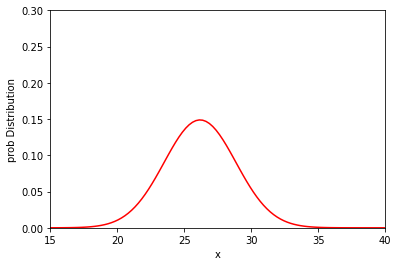

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 15.0
x_max = 40

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,100)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')




plt.xlim(x_min,x_max)
plt.ylim(0,0.30)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()

In [ ]:
#now we calculate it by simulation


# immediate preceder relation
d_c ={1:[2,3],2:[4,4],3:[4,5,6],4:[9,9],5:[7,8],6:[8,8],7:[9,9],8:[9,9]}

# time of each activity
t_c =[3,4.67,2.17,6.67,5,3.67,6.83,5.33,9.17]

In [ ]:
project_time =[]
paths =[]
currenttareas = 1
n = 50000
for i in range(n):
  currenttareas = 1
  paths =[currenttareas]

  time = 0
  time = time + t_c[currenttareas-1]
  while currenttareas < 9 :

    currenttareas=rnd.choice(d_c[currenttareas])
    paths.append(currenttareas)

    time = time + t_c[currenttareas-1]
    currenttareas=currenttareas
  #print(paths)
  #print(time)
  project_time.append(time)
print('Total project time is=',project_time)


Total project time is= [23.34, 23.509999999999998, 21.009999999999998, 24.67, 23.34, 23.34, 23.509999999999998, 21.009999999999998, 23.34, 23.509999999999998, 21.009999999999998, 23.509999999999998, 23.509999999999998, 23.509999999999998, 23.34, 24.67, 26.17, 23.34, 24.67, 23.509999999999998, 26.17, 23.509999999999998, 23.509999999999998, 21.009999999999998, 23.509999999999998, 23.34, 23.34, 21.009999999999998, 26.17, 26.17, 21.009999999999998, 23.34, 23.509999999999998, 23.34, 26.17, 23.509999999999998, 23.509999999999998, 23.509999999999998, 24.67, 23.509999999999998, 24.67, 21.009999999999998, 24.67, 24.67, 26.17, 23.509999999999998, 21.009999999999998, 23.34, 26.17, 23.509999999999998, 24.67, 23.509999999999998, 23.509999999999998, 23.509999999999998, 23.34, 23.509999999999998, 23.509999999999998, 23.509999999999998, 23.34, 23.509999999999998, 21.009999999999998, 23.509999999999998, 23.509999999999998, 23.509999999999998, 21.009999999999998, 23.509999999999998, 23.509999999999998, 

(array([ 8301.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  8274., 24917.,     0.,
            0.,     0.,     0.,     0.,     0.,  4211.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4297.]),
 array([21.01 , 21.182, 21.354, 21.526, 21.698, 21.87 , 22.042, 22.214,
        22.386, 22.558, 22.73 , 22.902, 23.074, 23.246, 23.418, 23.59 ,
        23.762, 23.934, 24.106, 24.278, 24.45 , 24.622, 24.794, 24.966,
        25.138, 25.31 , 25.482, 25.654, 25.826, 25.998, 26.17 ]),
 <a list of 30 Patch objects>)

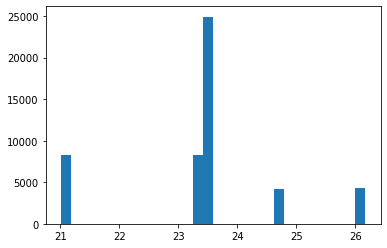

In [ ]:
plt.hist(project_time, bins=30)

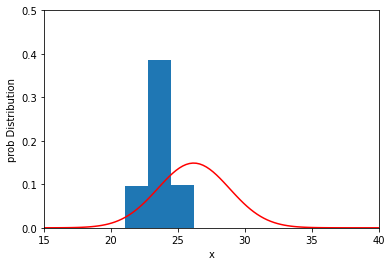

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 15.0
x_max = 40

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,100)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')

x=plt.hist(project_time,bins=3, density=True)


plt.xlim(x_min,x_max)
plt.ylim(0,0.5)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()

Now Consider the human behaviour by the ̶Parkinson’s Law;


In [ ]:

# First find the inverse of bets distribution with random probability
from scipy.stats import beta
for i in range(9):
  u=rnd.uniform(0,1)
  AD=beta.ppf(u,10,1,loc=2,scale=2)
  #print(AD)


In [ ]:
#PARKINSAN;'S LAW EFFECT
#Alpha (α) = [(µ - a) / (b – a)] * {[(µ - a)*(b - µ)/ σ**2]-1}
#Beta (β) = [(b - µ)/(µ - a)] * α
#ALPHA = 4m+x-5a/x-a
#beta = 5x-a-4m/x-a
alpha_1=[]
Beta_1=[]
for i in range(9):
  alpha = ((expected[i]-o[i])/(p[i]-o[i]))*(((expected[i]-o[i])*(p[i]-expected[i])/Variance[i])-1)
  Beta = ((p[i]-expected[i])/(expected[i]-o[i]))*alpha
  #ALPHA= (4*m[i]+x[i]-5*a[i])/(x[i]-a[i])
  #BETA= (5*x[i]+a[i]-4*m[i])/(x[i]-a[i])
  #print(ALPHA,BETA)
  alpha_1.append(alpha)
  Beta_1.append(Beta)
print('alpha=',alpha_1)
print('Beta=',Beta_1)


alpha= [4.0, 2.3333333333333344, 0.6666666666666655, 2.3333333333333344, 4.0, 1.7283950617283947, 4.336248785228376, 2.9382716049382713, 2.192383553330299]
Beta= [4.0, 4.666666666666668, 3.3333333333333313, 4.666666666666668, 4.0, 4.493827160493828, 3.582118561710398, 4.617283950617285, 4.647853133060234]


In [ ]:
RAND_AD=[]
for i in range(9):
  u=rnd.uniform(0,1)
  Rand_ad =beta.ppf(u,alpha_1[i],Beta_1[i],m[i],p[i]*alpha_1[i])
  #print(Rand_ad)
  RAND_AD.append(Rand_ad)
print('RAND_AD=',RAND_AD)

RAND_AD= [9.378399292268469, 18.313543054026823, 2.122478070810165, 17.254603869843002, 26.230834285742333, 7.251673007207572, 30.297398661258804, 10.473719408554842, 19.62138710732545]


In [ ]:
t_c1=[]
for i in range(9):
  Expected_duration = max(expected[i],RAND_AD[i])
  #print(Expected_duration)
  t_c1.append(Expected_duration)
print('Expected_duration=',t_c1)

Expected_duration= [9.378399292268469, 18.313543054026823, 2.1666666666666665, 17.254603869843002, 26.230834285742333, 7.251673007207572, 30.297398661258804, 10.473719408554842, 19.62138710732545]


In [ ]:
project_time_1 =[]
paths_1 =[]
currenttareas_1 = 1
n = 50000
for i in range(n):
  currenttareas_1 = 1
  paths_1 =[currenttareas_1]

  time_1 = 0
  time_1 = time_1 + t_c1[currenttareas_1-1]
  while currenttareas_1 < 9 :
    #time = time + t_c[currenttareas]
    currenttareas_1=rnd.choice(d_c[currenttareas_1])
    paths_1.append(currenttareas_1)
    #print(currenttareas)
    #paths_1.append(currenttareas_1)


    #i = dependencias.index((previous.__str__(), currenttareas.__str__()))
    time_1 = time_1 + t_c1[currenttareas_1-1]
    currenttareas_1=currenttareas_1
  #print(paths_1)
  #print(time_1)
  project_time_1.append(time_1)
print(project_time_1)
#print(max(project_time))
  #i = i+1
#print(project_time)

[64.56793332346375, 67.87100676055776, 87.69468601326172, 87.69468601326172, 48.891845482023, 48.891845482023, 48.42105693610358, 64.56793332346375, 64.56793332346375, 64.56793332346375, 48.42105693610358, 64.56793332346375, 64.56793332346375, 64.56793332346375, 64.56793332346375, 67.87100676055776, 87.69468601326172, 48.42105693610358, 64.56793332346375, 64.56793332346375, 48.42105693610358, 64.56793332346375, 64.56793332346375, 48.42105693610358, 48.891845482023, 87.69468601326172, 87.69468601326172, 64.56793332346375, 48.42105693610358, 64.56793332346375, 87.69468601326172, 64.56793332346375, 48.891845482023, 64.56793332346375, 48.891845482023, 48.891845482023, 87.69468601326172, 64.56793332346375, 64.56793332346375, 64.56793332346375, 48.42105693610358, 48.42105693610358, 87.69468601326172, 48.891845482023, 64.56793332346375, 64.56793332346375, 64.56793332346375, 87.69468601326172, 64.56793332346375, 48.891845482023, 64.56793332346375, 64.56793332346375, 64.56793332346375, 87.69468

(array([16580.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 25147.,     0.,  4097.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4176.]),
 array([48.42105694, 49.73017791, 51.03929887, 52.34841984, 53.65754081,
        54.96666178, 56.27578275, 57.58490372, 58.89402469, 60.20314566,
        61.51226663, 62.8213876 , 64.13050857, 65.43962954, 66.74875051,
        68.05787147, 69.36699244, 70.67611341, 71.98523438, 73.29435535,
        74.60347632, 75.91259729, 77.22171826, 78.53083923, 79.8399602 ,
        81.14908117, 82.45820214, 83.76732311, 85.07644407, 86.38556504,
        87.69468601]),
 <a list of 30 Patch objects>)

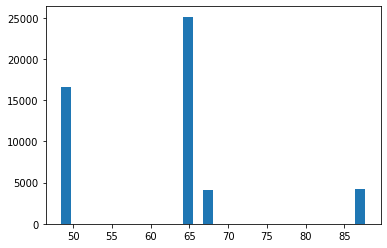

In [ ]:
plt.hist(project_time_1, bins=30)

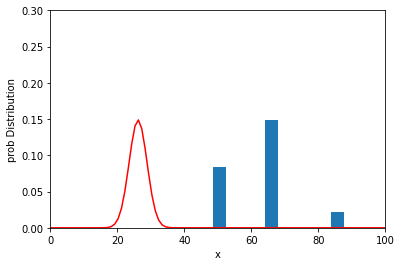

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0.0
x_max = 100

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,100)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')

x=plt.hist(project_time_1,bins=10, density=True)


plt.xlim(x_min,x_max)
plt.ylim(0,0.30)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()

In [ ]:
#NOW for parkinson;s law and hidden safety
DHS=[]
from scipy.stats import beta
for i in range(9):

  DHS1=beta.ppf(0.75,alpha_1[i],Beta_1[i],m[i],p[i]*alpha_1[i])
  DHS.append(DHS1)
print(DHS)

[12.938424949732681, 14.40100746061223, 2.499262416989958, 18.481208952734676, 24.876849899465363, 8.3276087496217, 36.08904319596529, 18.348542918342517, 25.04694573711408]


In [ ]:
t_c2=[]
for i in range (9):
  DHS_activity = max(DHS[i],RAND_AD[i])
  t_c2.append(DHS_activity)
print(t_c2)

[12.938424949732681, 18.313543054026823, 2.499262416989958, 18.481208952734676, 26.230834285742333, 8.3276087496217, 36.08904319596529, 18.348542918342517, 25.04694573711408]


In [ ]:
project_time_2 =[]
paths_2 =[]
currenttareas_2 = 1
n = 50000
for i in range(n):
  currenttareas_2 = 1
  paths_2 =[currenttareas_2]

  time_2 = 0
  time_2 = time_2 + t_c2[currenttareas_2-1]
  while currenttareas_2 < 9 :
    #time = time + t_c[currenttareas]
    currenttareas_2=rnd.choice(d_c[currenttareas_2])
    paths_2.append(currenttareas_2)
    #print(currenttareas)
    #paths_1.append(currenttareas_1)


    #i = dependencias.index((previous.__str__(), currenttareas.__str__()))
    time_2 = time_2 + t_c2[currenttareas_2-1]
    currenttareas_2=currenttareas_2
  #print(paths_1)
  #print(time_1)
  project_time_2.append(time_2)
print(project_time_2)
#print(max(project_time))
  #i = i+1
#print(project_time)

[67.16078477180093, 85.06401030792156, 74.78012269360826, 74.78012269360826, 74.78012269360826, 74.78012269360826, 74.78012269360826, 74.78012269360826, 74.78012269360826, 58.9658420565714, 58.9658420565714, 58.9658420565714, 85.06401030792156, 74.78012269360826, 67.16078477180093, 58.9658420565714, 58.9658420565714, 74.78012269360826, 74.78012269360826, 74.78012269360826, 58.9658420565714, 74.78012269360826, 58.9658420565714, 74.78012269360826, 85.06401030792156, 74.78012269360826, 102.80451058554434, 67.16078477180093, 74.78012269360826, 74.78012269360826, 58.9658420565714, 58.9658420565714, 58.9658420565714, 67.16078477180093, 74.78012269360826, 74.78012269360826, 85.06401030792156, 102.80451058554434, 102.80451058554434, 67.16078477180093, 85.06401030792156, 74.78012269360826, 58.9658420565714, 85.06401030792156, 74.78012269360826, 58.9658420565714, 74.78012269360826, 58.9658420565714, 74.78012269360826, 74.78012269360826, 85.06401030792156, 67.16078477180093, 67.16078477180093, 67

(array([ 8426.,     0.,     0.,     0.,     0.,  8360.,     0.,     0.,
            0.,     0., 24930.,     0.,     0.,     0.,     0.,     0.,
            0.,  4223.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4061.]),
 array([ 58.96584206,  60.42713101,  61.88841996,  63.34970891,
         64.81099786,  66.27228681,  67.73357576,  69.19486471,
         70.65615366,  72.11744262,  73.57873157,  75.04002052,
         76.50130947,  77.96259842,  79.42388737,  80.88517632,
         82.34646527,  83.80775422,  85.26904317,  86.73033212,
         88.19162108,  89.65291003,  91.11419898,  92.57548793,
         94.03677688,  95.49806583,  96.95935478,  98.42064373,
         99.88193268, 101.34322163, 102.80451059]),
 <a list of 30 Patch objects>)

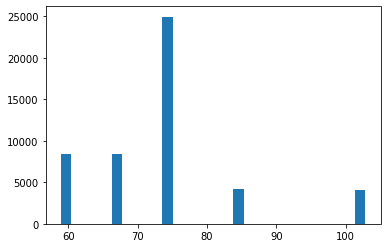

In [ ]:
plt.hist(project_time_2, bins=30)

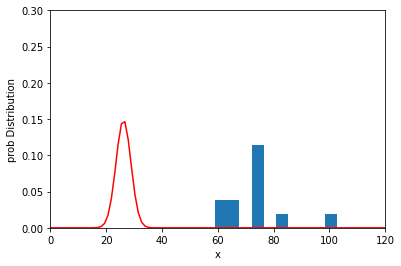

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0.0
x_max = 120

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,100)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')

x=plt.hist(project_time_2,bins=10, density=True)


plt.xlim(x_min,x_max)
plt.ylim(0,0.30)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()

Now consider human behaviour by Student's Syndrome

In [ ]:
# student syndrome
SSDELAY =[]
for i in range(9):
  SSDelay = expected[i]-m[i]
  SSDELAY.append(SSDelay)
print(SSDELAY)

[0.0, 0.666666666666667, 0.16666666666666652, 0.666666666666667, 0.0, 0.6666666666666665, -0.16666666666666696, 0.33333333333333304, 1.166666666666666]


In [ ]:
t_c3 = []
for i in range(9):
  Expected_dur = RAND_AD[i]+SSDELAY[i]
  t_c3.append(Expected_dur)
print(t_c3)

[9.378399292268469, 18.98020972069349, 2.2891447374768314, 17.92127053650967, 26.230834285742333, 7.918339673874238, 30.130731994592136, 10.807052741888175, 20.788053773992118]


In [ ]:
project_time_3 =[]
paths_3 =[]
currenttareas_3 = 1
n = 50000
for i in range(n):
  currenttareas_3 = 1
  paths_3 =[currenttareas_3]

  time_3 = 0
  time_3 = time_3 + t_c3[currenttareas_3-1]
  while currenttareas_3 < 9 :
    #time = time + t_c[currenttareas]
    currenttareas_3=rnd.choice(d_c[currenttareas_3])
    paths_3.append(currenttareas_3)
    #print(currenttareas)
    #paths_1.append(currenttareas_1)


    #i = dependencias.index((previous.__str__(), currenttareas.__str__()))
    time_3 = time_3 + t_c3[currenttareas_3-1]
    currenttareas_3=currenttareas_3
  #print(paths_1)
  #print(time_1)
  project_time_3.append(time_3)
print(project_time_3)
#print(max(project_time))
  #i = i+1
#print(project_time)

[51.18099021949983, 50.376868340247086, 67.06793332346375, 67.06793332346375, 51.18099021949983, 50.376868340247086, 51.18099021949983, 67.06793332346375, 67.06793332346375, 67.06793332346375, 50.376868340247086, 51.18099021949983, 67.06793332346375, 88.81716408407189, 51.18099021949983, 50.376868340247086, 50.376868340247086, 50.376868340247086, 69.49348483136792, 67.06793332346375, 88.81716408407189, 69.49348483136792, 51.18099021949983, 50.376868340247086, 67.06793332346375, 50.376868340247086, 69.49348483136792, 51.18099021949983, 67.06793332346375, 51.18099021949983, 67.06793332346375, 51.18099021949983, 67.06793332346375, 69.49348483136792, 88.81716408407189, 67.06793332346375, 67.06793332346375, 67.06793332346375, 69.49348483136792, 88.81716408407189, 51.18099021949983, 50.376868340247086, 51.18099021949983, 51.18099021949983, 69.49348483136792, 50.376868340247086, 51.18099021949983, 67.06793332346375, 67.06793332346375, 69.49348483136792, 51.18099021949983, 67.06793332346375, 6

(array([16637.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 24909.,  4313.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4141.]),
 array([50.37686834, 51.65821153, 52.93955472, 54.22089791, 55.50224111,
        56.7835843 , 58.06492749, 59.34627068, 60.62761387, 61.90895706,
        63.19030025, 64.47164345, 65.75298664, 67.03432983, 68.31567302,
        69.59701621, 70.8783594 , 72.1597026 , 73.44104579, 74.72238898,
        76.00373217, 77.28507536, 78.56641855, 79.84776174, 81.12910494,
        82.41044813, 83.69179132, 84.97313451, 86.2544777 , 87.53582089,
        88.81716408]),
 <a list of 30 Patch objects>)

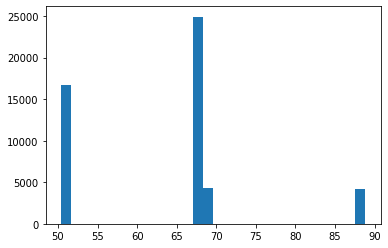

In [ ]:
plt.hist(project_time_3, bins=30)

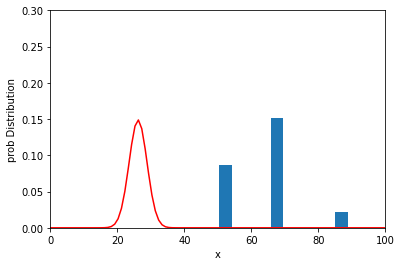

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0.0
x_max = 100

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,100)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')

x=plt.hist(project_time_3,bins=10, density=True)


plt.xlim(x_min,x_max)
plt.ylim(0,0.30)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()

When all the three effect combined

In [ ]:
SSDELAY1 =[]
for i in range(9):
  SSDelay1 = DHS[i]-m[i]
  SSDELAY1.append(SSDelay1)
print(SSDELAY1)

[9.938424949732681, 10.40100746061223, 0.499262416989958, 12.481208952734676, 19.876849899465363, 5.3276087496216995, 29.08904319596529, 13.348542918342517, 17.04694573711408]


In [ ]:
t_c4 = []
for i in range(9):
  Expected_dur1 = RAND_AD[i]+SSDELAY1[i]
  t_c4.append(Expected_dur1)
print(t_c4)

[19.31682424200115, 28.71455051463905, 2.621740487800123, 29.735812822577678, 46.107684185207695, 12.579281756829271, 59.38644185722409, 23.82226232689736, 36.66833284443953]


In [ ]:
project_time_4 =[]
paths_4 =[]
currenttareas_4 = 1
n = 50000
for i in range(n):
  currenttareas_4 = 1
  paths_4 =[currenttareas_4]

  time_4 = 0
  time_4 = time_4 + t_c4[currenttareas_4-1]
  while currenttareas_4 < 9 :

    currenttareas_4=rnd.choice(d_c[currenttareas_4])
    paths_4.append(currenttareas_4)

    time_4 = time_4 + t_c4[currenttareas_4-1]
    currenttareas_4=currenttareas_4

  project_time_4.append(time_4)
print(project_time_4)


[114.43552042365741, 95.00844165796744, 95.00844165796744, 114.43552042365741, 88.34271039681849, 114.43552042365741, 95.00844165796744, 95.00844165796744, 88.34271039681849, 88.34271039681849, 164.1010236166726, 164.1010236166726, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 88.34271039681849, 164.1010236166726, 88.34271039681849, 95.00844165796744, 88.34271039681849, 95.00844165796744, 114.43552042365741, 114.43552042365741, 114.43552042365741, 95.00844165796744, 114.43552042365741, 95.00844165796744, 95.00844165796744, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 114.43552042365741, 88.34271039681849, 114.43552042365741, 95.00844165796744, 95.00844165796744, 114.43552042365741, 88.34271039681849, 114.43552042365741, 114.43552042365741, 88.34271039681849, 114.43552042365741, 114.43552042365741, 114.43552042365741, 88.34271039681849, 114.43552042365741, 95.

(array([ 8196.,     0.,  8154.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 25276.,     0.,     0.,     0.,     0.,  4245.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  4129.]),
 array([ 88.3427104 ,  90.8679875 ,  93.39326461,  95.91854172,
         98.44381883, 100.96909593, 103.49437304, 106.01965015,
        108.54492726, 111.07020436, 113.59548147, 116.12075858,
        118.64603568, 121.17131279, 123.6965899 , 126.22186701,
        128.74714411, 131.27242122, 133.79769833, 136.32297544,
        138.84825254, 141.37352965, 143.89880676, 146.42408387,
        148.94936097, 151.47463808, 153.99991519, 156.52519229,
        159.0504694 , 161.57574651, 164.10102362]),
 <a list of 30 Patch objects>)

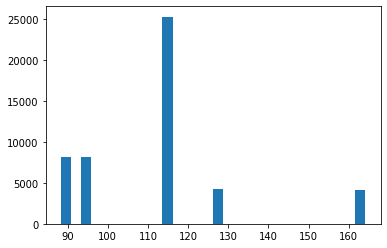

In [ ]:
plt.hist(project_time_4,bins=30, density=False)

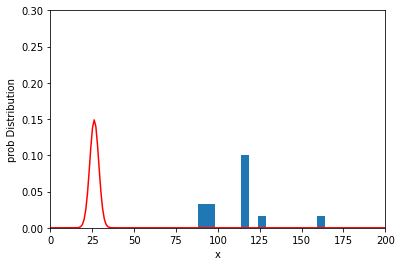

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0.0
x_max = 200

mean = 26.17
std = 2.68

x = np.linspace(x_min, x_max,200)


y = scipy.stats.norm.pdf(x,mean,std)


plt.plot(x,y, color='red')

x=plt.hist(project_time_4,bins=15, density=True)


plt.xlim(x_min,x_max)
plt.ylim(0,0.30)


plt.xlabel('x')
plt.ylabel('prob Distribution')


plt.show()